<a href="https://colab.research.google.com/github/haaso-create/Public-Reliability-testing/blob/main/Weibull_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4-3451668818.py:26: RuntimeWarning: invalid value encountered in power
  return 1 - np.exp(-(t / eta) ** beta)


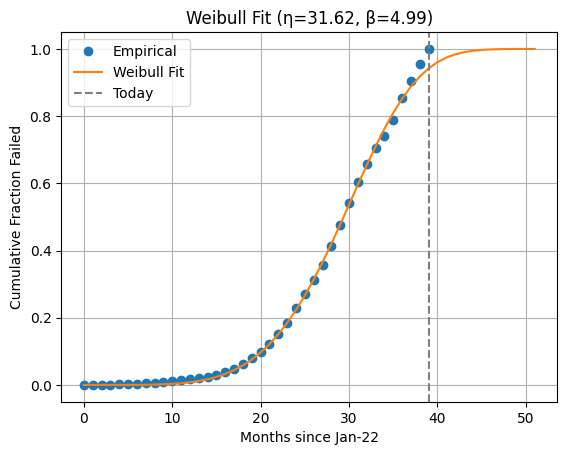

Predicted Failures (Next 12 Months):
Month 1: 402.8
Month 2: 297.4
Month 3: 210.2
Month 4: 141.7
Month 5: 90.9
Month 6: 55.2
Month 7: 31.7
Month 8: 17.1
Month 9: 8.7
Month 10: 4.1
Month 11: 1.8
Month 12: 0.7


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data: Age in months from Jan-22 (0) to April-25
cumulative = np.array([
   1, 4, 15, 20, 29, 45, 73, 108, 151, 198, 244, 299, 361, 440, 527, 648, 823, 1067, 1376, 1723, 2141, 2680, 3279, 4044, 5008, 5888, 6791, 7808, 9024, 10408, 11798, 13207, 14365, 15412, 16207, 17216, 18665, 19784, 20872, 21849

])
ages = np.arange(len(cumulative))

# Normalize to get empirical CDF
cdf = cumulative / 21849

# Trim data before plateau (optional but recommended)
plateau_start_idx = np.argmax(cumulative == 21849)
if plateau_start_idx > 0:
    fit_ages = ages[:plateau_start_idx]
    fit_cdf = cdf[:plateau_start_idx]
else:
    fit_ages = ages
    fit_cdf = cdf

# Weibull CDF function
def weibull_cdf(t, eta, beta):
    return 1 - np.exp(-(t / eta) ** beta)

# Fit Weibull model
popt, _ = curve_fit(weibull_cdf, fit_ages, fit_cdf, p0=(50, 1.5))
eta, beta = popt

# Predict future CDF values
future_months = 12
total_months = len(ages) + future_months
full_cdf = weibull_cdf(np.arange(total_months), eta, beta)

# Convert CDF to predicted cumulative failures, then compute monthly deltas
full_cumulative = full_cdf * 21849
predicted_failures = np.diff(full_cumulative)[-future_months:]

# Prevent negatives
predicted_failures = np.maximum(predicted_failures, 0)

# Plot
plt.plot(ages, cdf, 'o', label="Empirical")
plt.plot(np.arange(total_months), full_cdf, label="Weibull Fit")
plt.axvline(x=len(ages)-1, color='gray', linestyle='--', label="Today")
plt.legend()
plt.title(f'Weibull Fit (η={eta:.2f}, β={beta:.2f})')
plt.xlabel("Months since Jan-22")
plt.ylabel("Cumulative Fraction Failed")
plt.grid(True)
plt.show()

# Output
print("Predicted Failures (Next 12 Months):")
for i, val in enumerate(predicted_failures, 1):
    print(f"Month {i}: {val:.1f}")



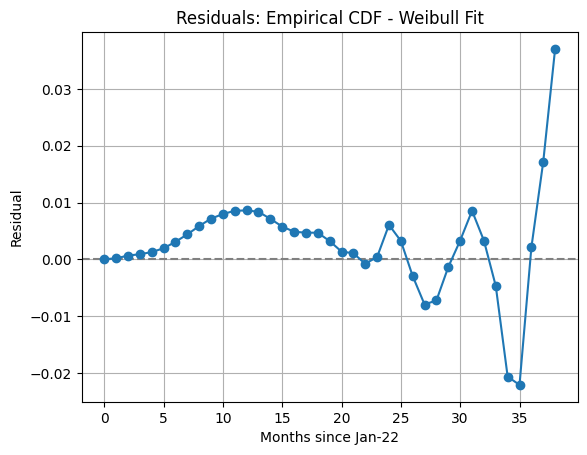

In [ ]:
# Calculate residuals for Weibull fit
weibull_residuals = fit_cdf - weibull_cdf(fit_ages, eta, beta)

# Plot residuals
plt.figure()
plt.axhline(0, color='gray', linestyle='--')
plt.plot(fit_ages, weibull_residuals, marker='o')
plt.title("Residuals: Empirical CDF - Weibull Fit")
plt.xlabel("Months since Jan-22")
plt.ylabel("Residual")
plt.grid(True)
plt.show()


Trying with exponential


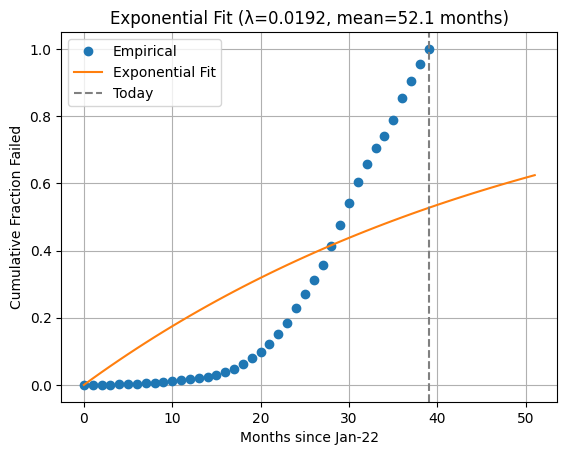

Predicted Failures (Next 12 Months):
Month 1: 196.5
Month 2: 192.8
Month 3: 189.1
Month 4: 185.5
Month 5: 182.0
Month 6: 178.5
Month 7: 175.1
Month 8: 171.8
Month 9: 168.5
Month 10: 165.3
Month 11: 162.2
Month 12: 159.1


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data: cumulative failures over time (months from Jan-22)
cumulative = np.array([
   1, 4, 15, 20, 29, 45, 73, 108, 151, 198, 244, 299, 361, 440, 527, 648, 823, 1067, 1376, 1723,
   2141, 2680, 3279, 4044, 5008, 5888, 6791, 7808, 9024, 10408, 11798, 13207, 14365, 15412, 16207,
   17216, 18665, 19784, 20872, 21849
])
ages = np.arange(len(cumulative))

# Normalize to get empirical CDF
cdf = cumulative / cumulative[-1]  # normalize to final value

# Optional trim to exclude plateau (saturation)
plateau_start_idx = np.argmax(cumulative == cumulative[-1])
if plateau_start_idx > 0:
    fit_ages = ages[:plateau_start_idx]
    fit_cdf = cdf[:plateau_start_idx]
else:
    fit_ages = ages
    fit_cdf = cdf

# Exponential CDF function
def exponential_cdf(t, lambd):
    return 1 - np.exp(-lambd * t)

# Fit Exponential model
popt, _ = curve_fit(exponential_cdf, fit_ages, fit_cdf, p0=(0.01,))
lambd = popt[0]

# Predict future CDF values
future_months = 12
total_months = len(ages) + future_months
full_cdf = exponential_cdf(np.arange(total_months), lambd)

# Convert CDF to predicted cumulative failures, then compute monthly deltas
full_cumulative = full_cdf * cumulative[-1]
predicted_failures = np.diff(full_cumulative)[-future_months:]

# Prevent negatives
predicted_failures = np.maximum(predicted_failures, 0)

# Plot
plt.plot(ages, cdf, 'o', label="Empirical")
plt.plot(np.arange(total_months), full_cdf, label="Exponential Fit")
plt.axvline(x=len(ages)-1, color='gray', linestyle='--', label="Today")
plt.legend()
plt.title(f'Exponential Fit (λ={lambd:.4f}, mean={1/lambd:.1f} months)')
plt.xlabel("Months since Jan-22")
plt.ylabel("Cumulative Fraction Failed")
plt.grid(True)
plt.show()

# Output
print("Predicted Failures (Next 12 Months):")
for i, val in enumerate(predicted_failures, 1):
    print(f"Month {i}: {val:.1f}")


Trying with beta

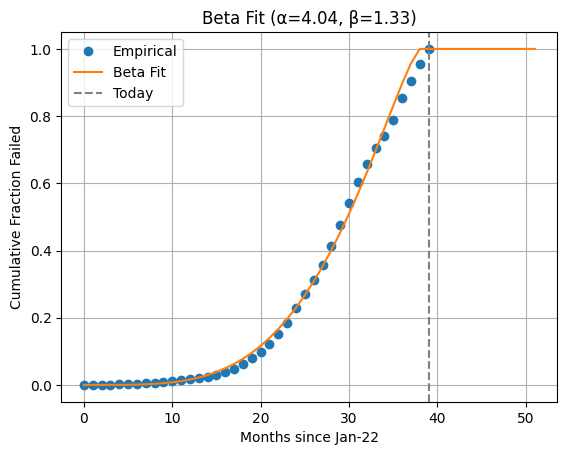

Predicted Failures (Next 12 Months):
Month 1: 0.0
Month 2: 0.0
Month 3: 0.0
Month 4: 0.0
Month 5: 0.0
Month 6: 0.0
Month 7: 0.0
Month 8: 0.0
Month 9: 0.0
Month 10: 0.0
Month 11: 0.0
Month 12: 0.0


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import beta as beta_dist
import matplotlib.pyplot as plt

# Cumulative failures over months from Jan-22 to Apr-25
cumulative = np.array([
   1, 4, 15, 20, 29, 45, 73, 108, 151, 198, 244, 299, 361, 440, 527, 648, 823, 1067, 1376, 1723,
   2141, 2680, 3279, 4044, 5008, 5888, 6791, 7808, 9024, 10408, 11798, 13207, 14365, 15412, 16207,
   17216, 18665, 19784, 20872, 21849
])
ages = np.arange(len(cumulative))
cdf = cumulative / cumulative[-1]  # normalize

# Remove plateau for fitting
plateau_start_idx = np.argmax(cumulative == cumulative[-1])
fit_ages = ages[:plateau_start_idx] if plateau_start_idx > 0 else ages
fit_cdf = cdf[:plateau_start_idx] if plateau_start_idx > 0 else cdf
max_age = fit_ages[-1]

# Define Beta CDF function (with scaled time)
def beta_cdf(t, a, b):
    t_scaled = t / max_age  # scale time to [0, 1]
    return beta_dist.cdf(t_scaled, a, b)

# Fit the Beta distribution
popt, _ = curve_fit(beta_cdf, fit_ages, fit_cdf, p0=(2, 5), bounds=(0.01, 10))
a_fit, b_fit = popt

# Predict future
future_months = 12
total_months = len(ages) + future_months
predict_ages = np.arange(total_months)
full_cdf = beta_cdf(predict_ages, a_fit, b_fit)

# Convert to cumulative and monthly predicted failures
full_cumulative = full_cdf * cumulative[-1]
predicted_failures = np.diff(full_cumulative)[-future_months:]
predicted_failures = np.maximum(predicted_failures, 0)

# Plot
plt.plot(ages, cdf, 'o', label="Empirical")
plt.plot(predict_ages, full_cdf, label="Beta Fit")
plt.axvline(x=len(ages)-1, color='gray', linestyle='--', label="Today")
plt.title(f'Beta Fit (α={a_fit:.2f}, β={b_fit:.2f})')
plt.xlabel("Months since Jan-22")
plt.ylabel("Cumulative Fraction Failed")
plt.grid(True)
plt.legend()
plt.show()

# Output predicted failures
print("Predicted Failures (Next 12 Months):")
for i, val in enumerate(predicted_failures, 1):
    print(f"Month {i}: {val:.1f}")


In [ ]:
import numpy as np
from scipy.stats import weibull_min
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Example failure time data (replace with your data)
data = np.array([
    5, 6, 7, 10, 12, 13, 14, 20, 25, 30, 35, 40,
    45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100
])

# Number of components in the mixture
K = 2

# Initialize parameters
weights = np.ones(K) / K  # mixture weights
shapes = np.array([1.5, 3.0])  # shape params (beta)
scales = np.array([20, 50])  # scale params (eta)

def weibull_pdf(x, shape, scale):
    return weibull_min.pdf(x, c=shape, scale=scale)

def log_likelihood(data, weights, shapes, scales):
    likelihood = 0
    for k in range(K):
        likelihood += weights[k] * weibull_pdf(data, shapes[k], scales[k])
    return np.sum(np.log(likelihood))

def m_step(data, responsibilities):
    new_weights = responsibilities.mean(axis=0)

    new_shapes = np.zeros(K)
    new_scales = np.zeros(K)
    for k in range(K):
        # Fit Weibull to weighted data by maximizing likelihood
        def neg_log_likelihood(params):
            shape, scale = params
            if shape <= 0 or scale <= 0:
                return np.inf
            pdf_vals = weibull_pdf(data, shape, scale)
            # Weighted negative log-likelihood
            return -np.sum(responsibilities[:, k] * np.log(pdf_vals + 1e-10))

        res = minimize(neg_log_likelihood, [shapes[k], scales[k]], method='L-BFGS-B', bounds=[(1e-3, None), (1e-3, None)])
        new_shapes[k], new_scales[k] = res.x

    return new_weights, new_shapes, new_scales

def e_step(data, weights, shapes, scales):
    resp = np.zeros((len(data), K))
    for k in range(K):
        resp[:, k] = weights[k] * weibull_pdf(data, shapes[k], scales[k])
    resp_sum = resp.sum(axis=1, keepdims=True)
    resp /= resp_sum
    return resp

# EM Algorithm
max_iter = 100
tol = 1e-5
for i in range(max_iter):
    responsibilities = e_step(data, weights, shapes, scales)
    weights_new, shapes_new, scales_new = m_step(data, responsibilities)

    # Check convergence
    if np.allclose(weights, weights_new, atol=tol) and \
       np.allclose(shapes, shapes_new, atol=tol) and \
       np.allclose(scales, scales_new, atol=tol):
        break

    weights, shapes, scales = weights_new, shapes_new, scales_new
    print(f"Iteration {i+1}: weights={weights}, shapes={shapes}, scales={scales}")

print("Final parameters:")
print(f"Weights: {weights}")
print(f"Shapes: {shapes}")
print(f"Scales: {scales}")

# Plot mixture PDF vs histogram
x = np.linspace(min(data), max(data), 200)
pdf_mixture = sum(w * weibull_pdf(x, sh, sc) for w, sh, sc in zip(weights, shapes, scales))

plt.hist(data, bins=10, density=True, alpha=0.5, label="Data histogram")
plt.plot(x, pdf_mixture, label="Weibull mixture PDF", color='red')
plt.legend()
plt.show()


In [2]:
pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=dc84664b0cb8c90fafb2c836f9696e07112f01841c4b033d0bd60093060e6746
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/WeiTest.xlsx')

# To check the data loaded
array = df.to_numpy()
array

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[ 1.,  0.,  0., ...,  1.,  1.,  1.],
       [ 2.,  0.,  0., ...,  2.,  4.,  3.],
       [ 3.,  0.,  0., ...,  0.,  1.,  3.],
       ...,
       [34., 11., 38., ..., nan, nan, nan],
       [35., 15., 18., ..., nan, nan, nan],
       [36., 11., 34., ..., nan, nan, nan]])

In [ ]:
import numpy as np
import pandas as pd
from lifelines import WeibullFitter

from google.colab import drive

drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/WeiTest.xlsx')


cohort_failures = df.to_numpy()
observed_mask = ~np.isnan(cohort_failures)
cohort_failures = np.array(cohort_failures, dtype=np.float64)
cohort_failures = np.nan_to_num(cohort_failures, nan=0.0)


# Total units manufactured per cohort
cohort_sizes = [504, 1637, 3072, 3147, 3810, 4557, 5085, 5215, 5006, 5001,
    5508, 6088, 6029, 6419, 5155, 5716, 5510, 6032, 4481, 5221,
    4689, 5195, 5326, 6035, 6540, 9040, 9235, 7476, 5370, 11157,
    7943, 6562, 5864, 5070, 5525, 5505, 8014, 9007, 10005, 9023,
    7304, 9667, 7804, 7212, 5205, 2944]

max_months = cohort_failures.shape[1]
def build_failure_data_with_mask(cohort_failures, observed_mask, cohort_sizes):
    """
    Build failure times and censoring info from failure data and observation mask.

    Parameters:
    - failures: 2D array (cohorts x months) of failure counts
    - observed_mask: 2D boolean array of same shape, True = month was observed
    - cohort_units: list/array of total units manufactured per cohort

    Returns:
    - failure_times: list of times (months) for all observed events and censored ones
    - event_observed: 1 for failure, 0 for censored
    """
    failure_times = []
    event_observed = []

    num_cohorts = failures.shape[0]

    for i in range(num_cohorts):
        cohort_failures = failures[i]
        cohort_mask = observed_mask[i]
        total_units = cohort_sizes[i]

        observed_months = np.where(cohort_mask)[0]
        if len(observed_months) == 0:
            continue

        last_observed_month = observed_months[-1]

        # Add failures
        for month in observed_months:
            count = int(cohort_failures[month])
            failure_times.extend([month + 1] * count)
            event_observed.extend([1] * count)

        # Add censored units (not yet failed, but observed up to last month)
        failed_units = np.sum(cohort_failures[cohort_mask])
        censored_units = total_units - failed_units
        if censored_units > 0:
            failure_times.extend([last_observed_month + 1] * censored_units)
            event_observed.extend([0] * censored_units)

    return failure_times, event_observed
build_failure_data_with_mask(cohort_failures, observed_mask, cohort_sizes)

print(failure_times)
print(event_observe)


# Fit Weibull for each cohort
weibull_fits = []
for i, (failures, size) in enumerate(zip(cohort_failures, cohort_sizes)):
    df_cohort = prepare_cohort_data(failures, size, max_months)

    wf = WeibullFitter()
    wf.fit(df_cohort['time'], df_cohort['event'], label=f"Cohort {i+1}")


    weibull_fits.append(wf)
print(weibull_fits)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IndexError: invalid index to scalar variable.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


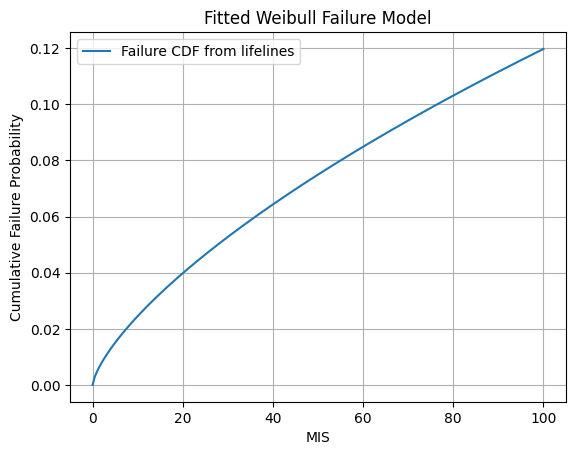

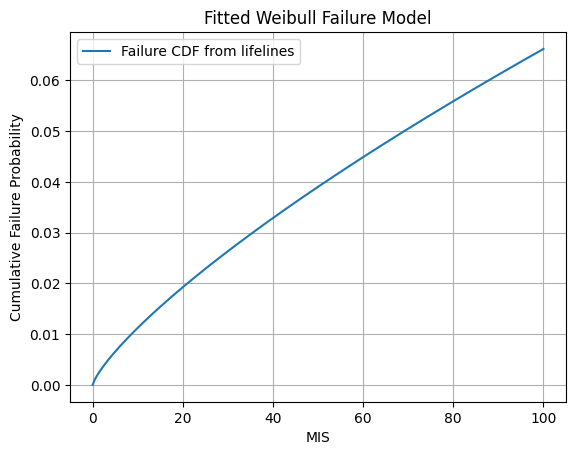

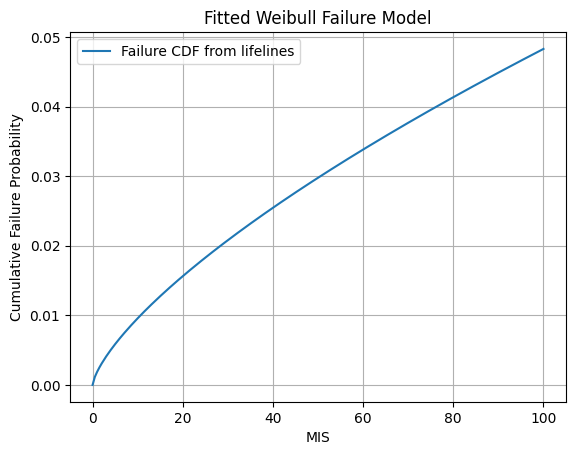

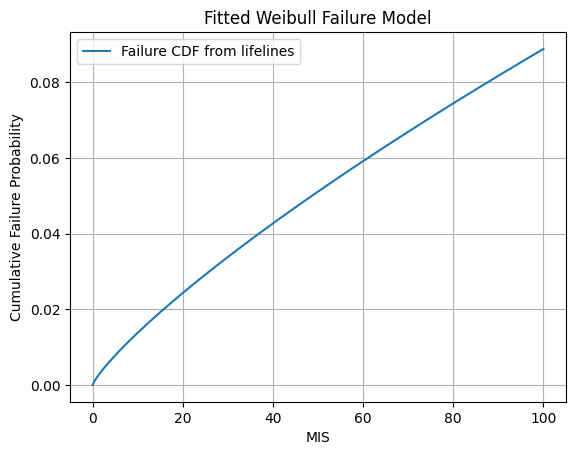

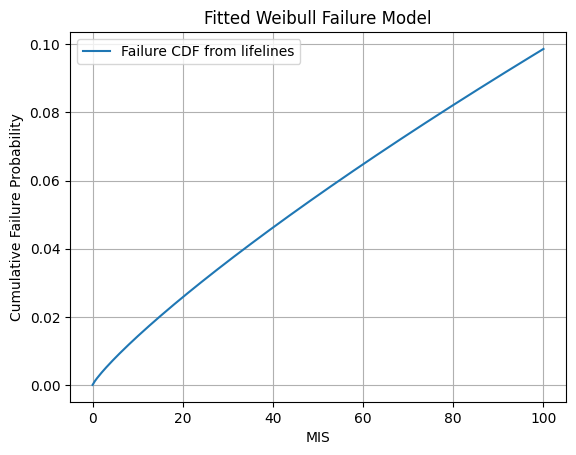

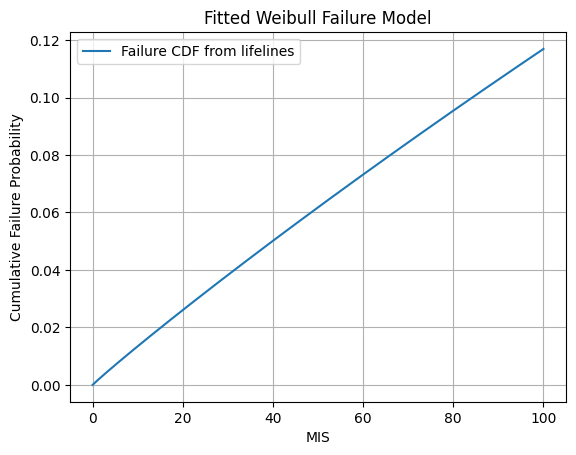

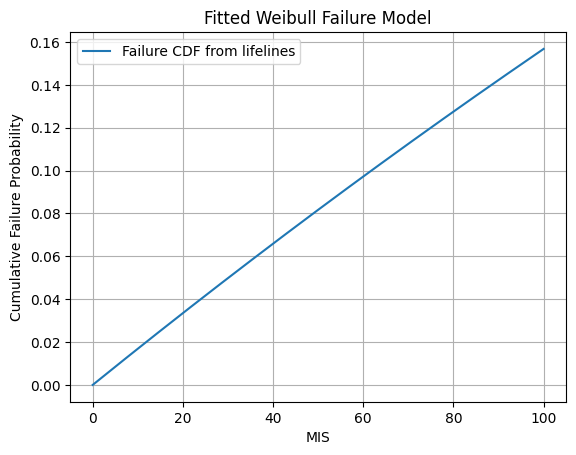

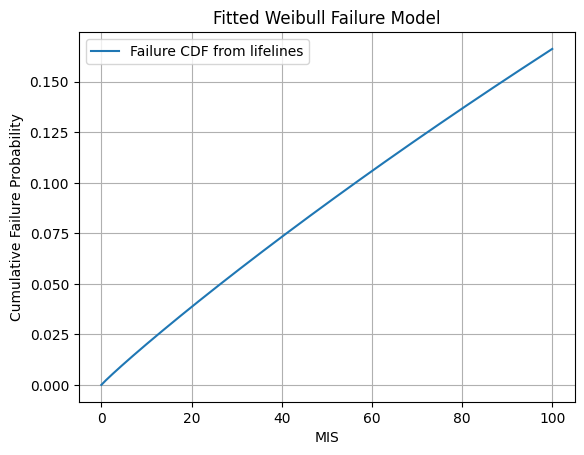

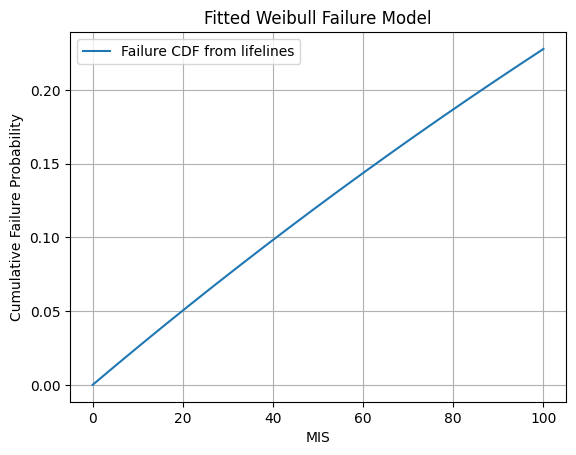

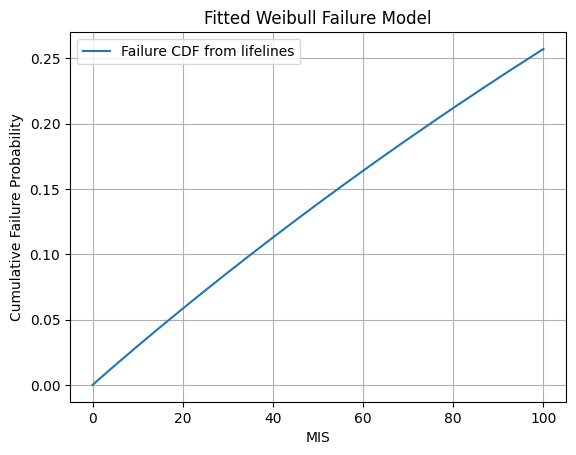

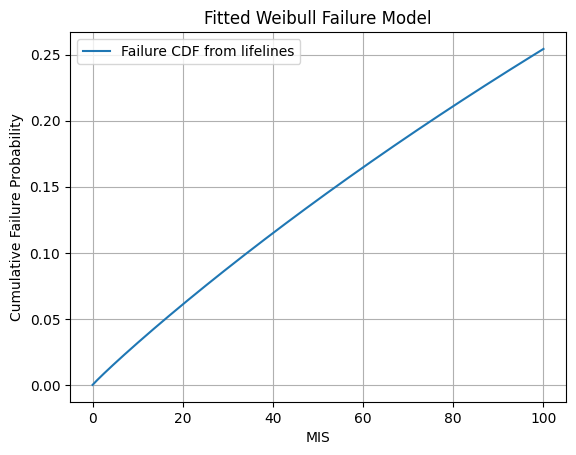

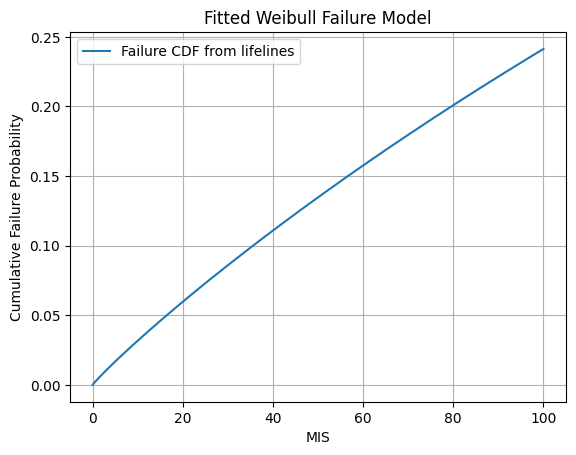

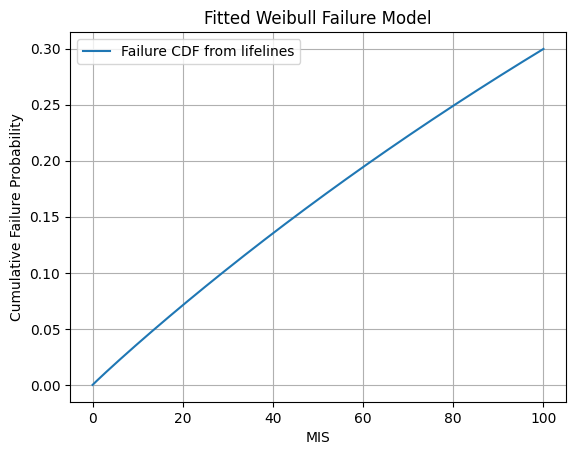

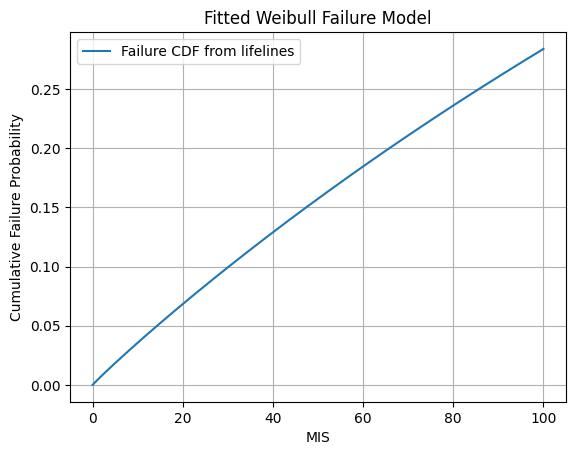

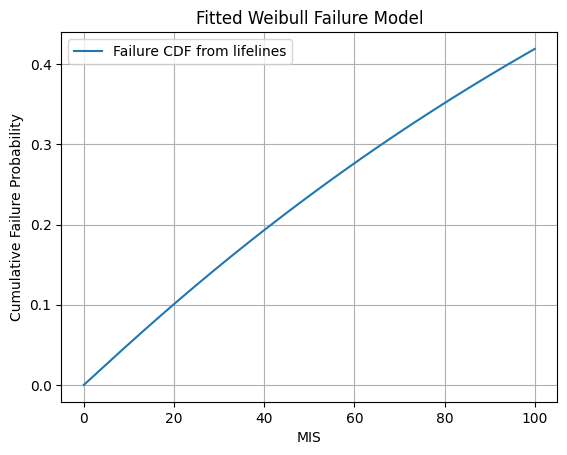

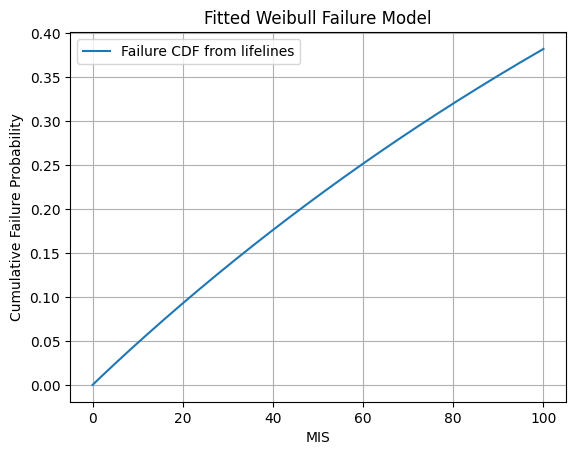

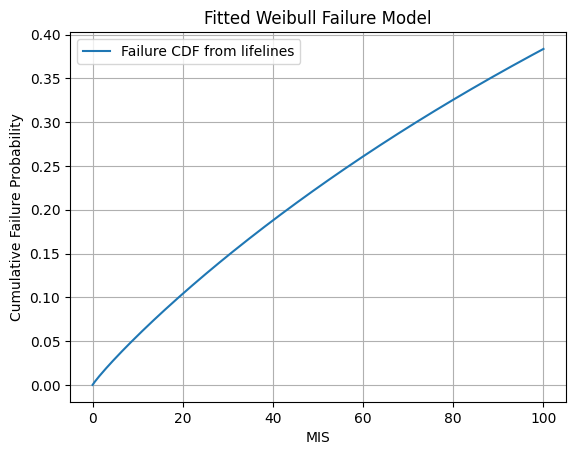

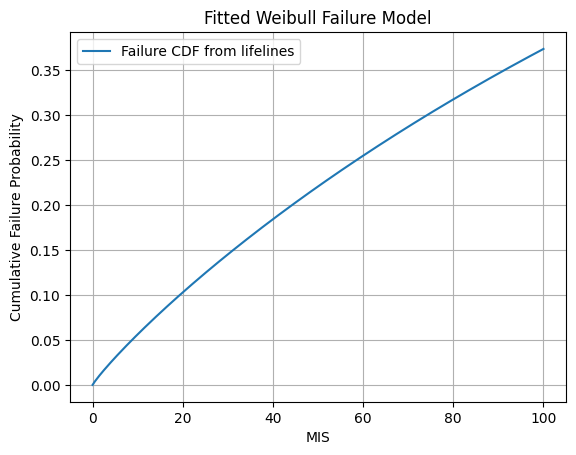

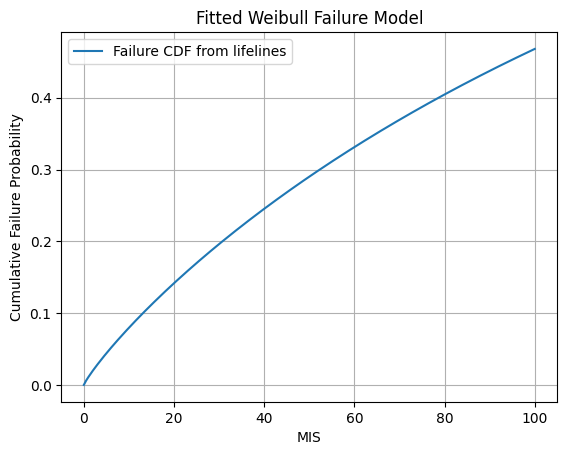

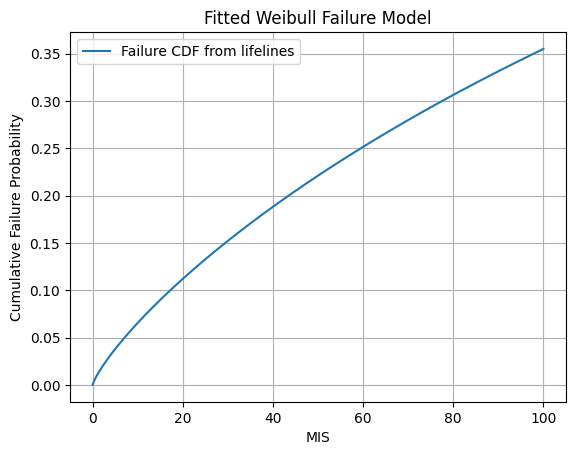

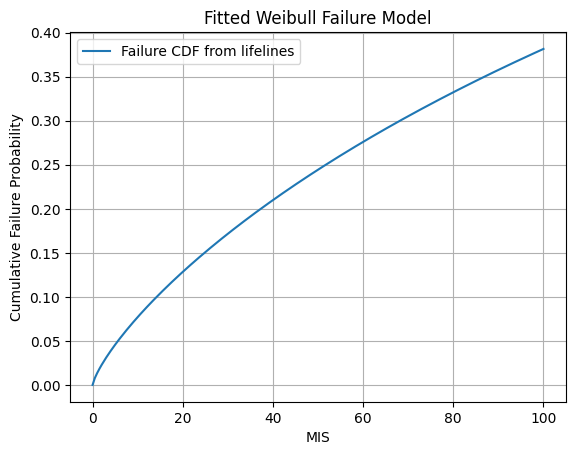

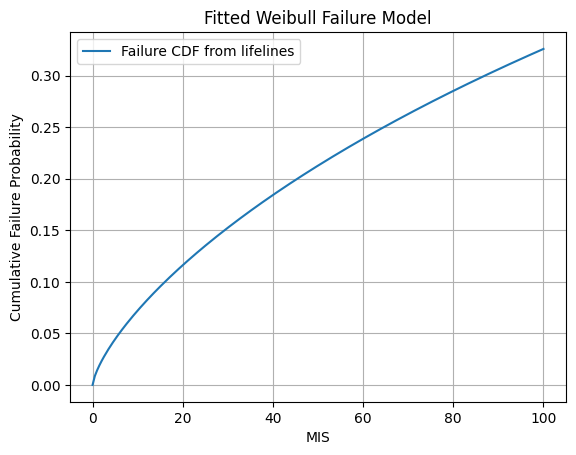

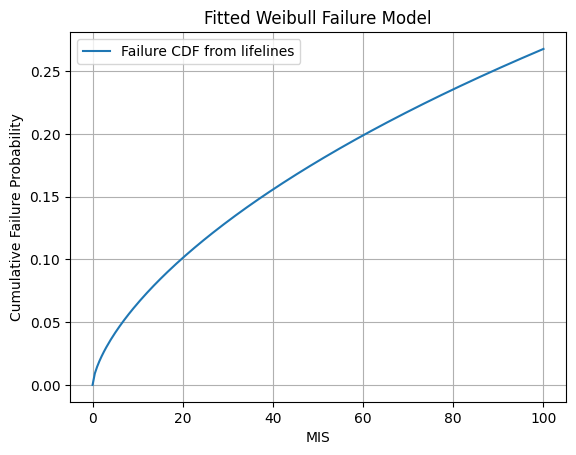

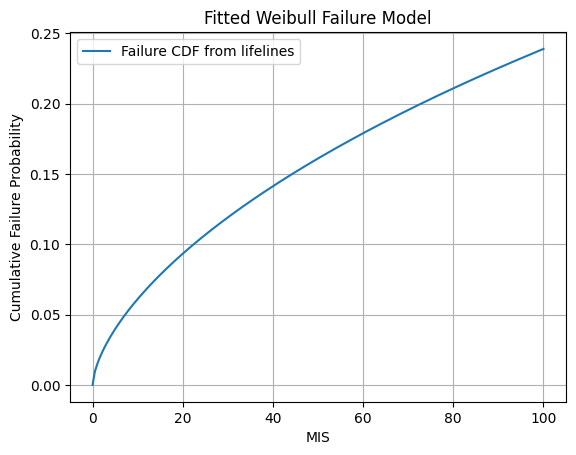

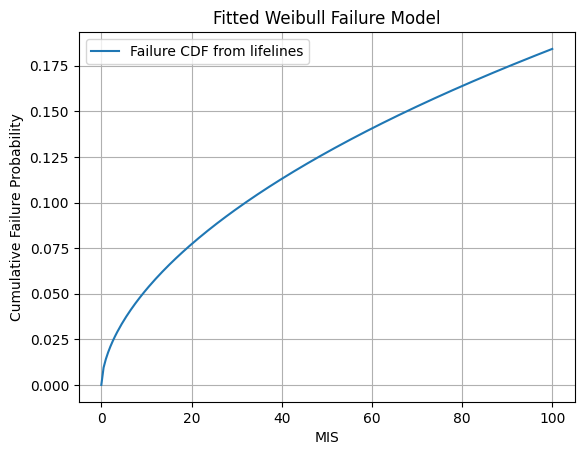

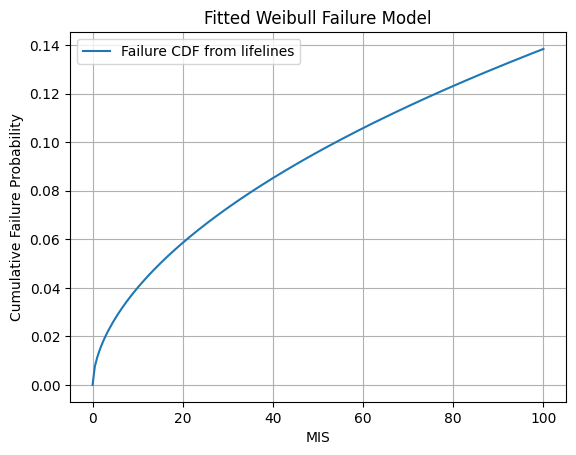

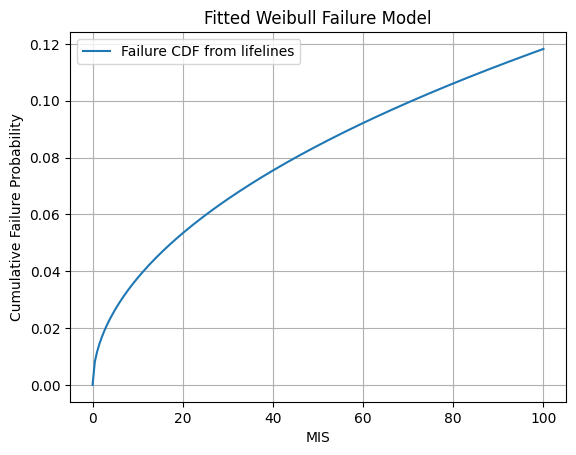

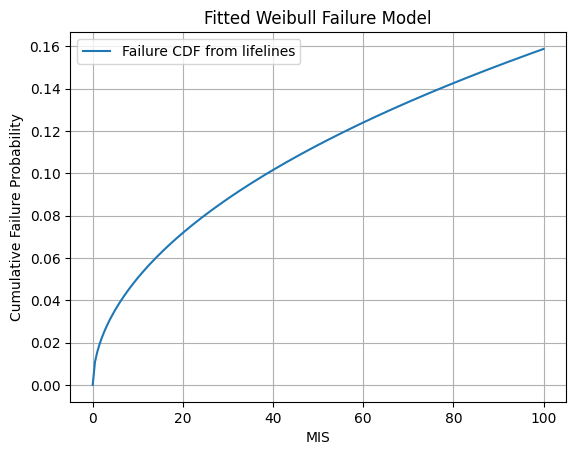

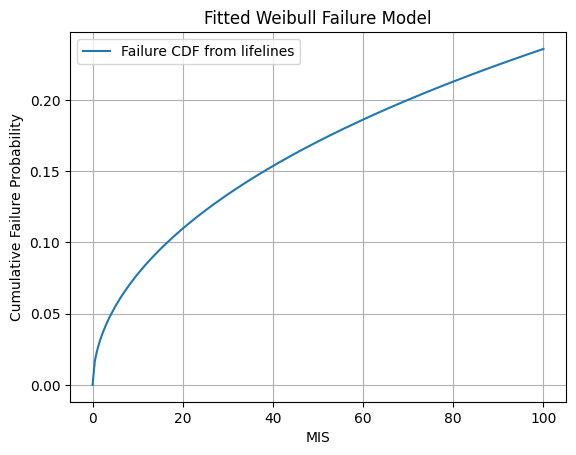

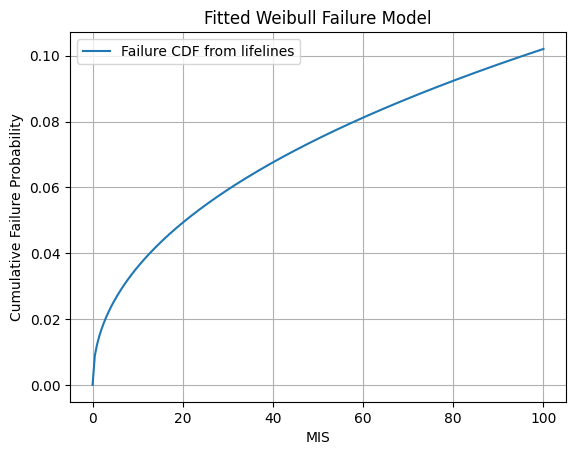

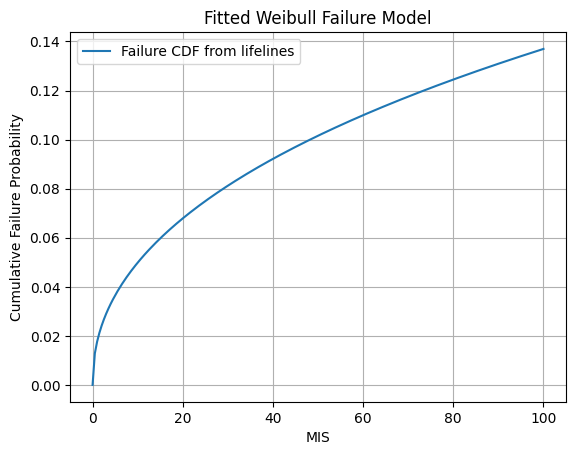

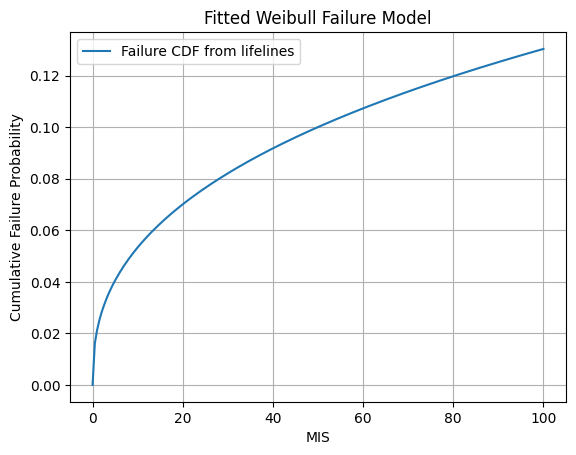

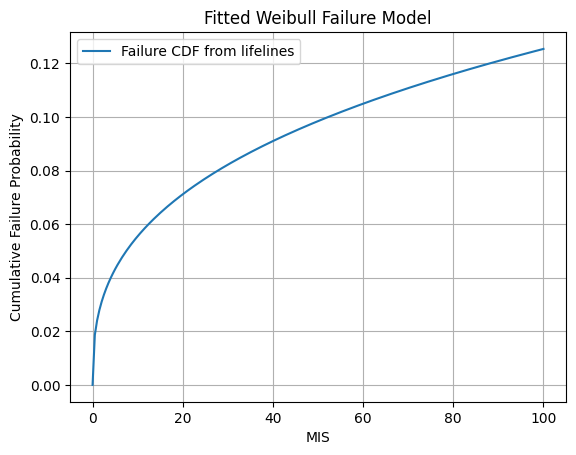

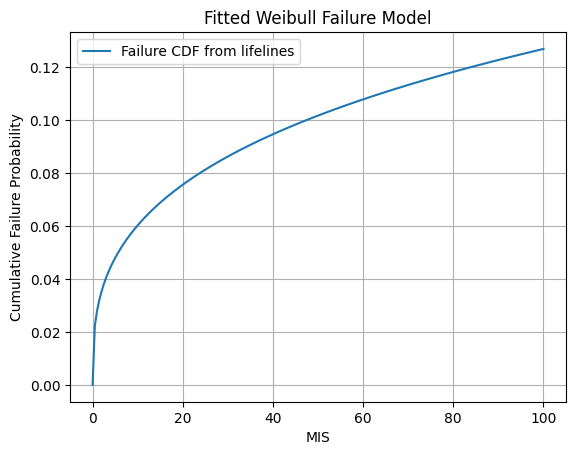

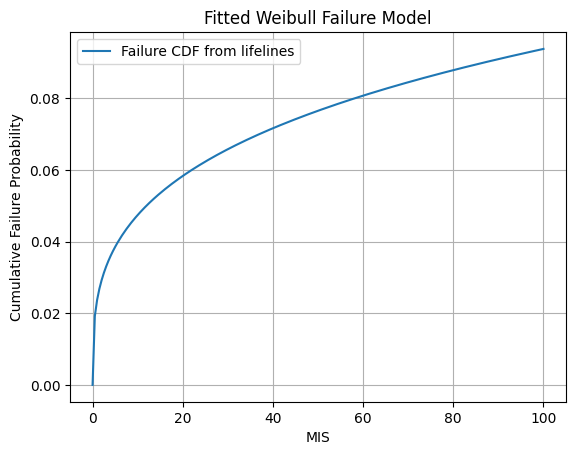

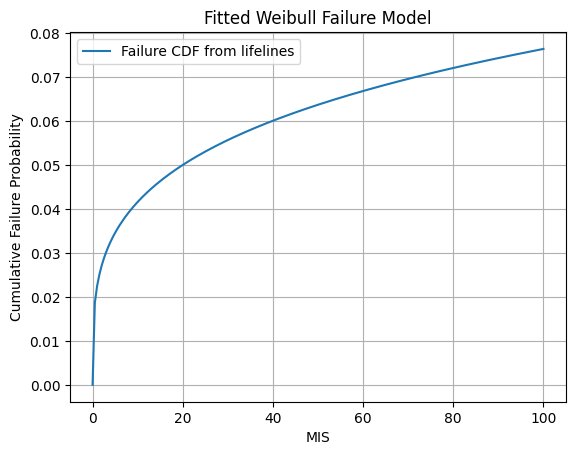

[[1.81215102e+03 7.10831336e-01]
 [3.07420176e+03 7.82689859e-01]
 [6.84304289e+03 7.11385463e-01]
 [1.77316344e+03 8.26138426e-01]
 [1.39946532e+03 8.58303326e-01]
 [8.71095989e+02 9.63129255e-01]
 [5.86122033e+02 1.00037711e+00]
 [5.99949113e+02 9.51473121e-01]
 [3.87164510e+02 9.99623281e-01]
 [3.39323443e+02 9.92467799e-01]
 [3.59893262e+02 9.57239922e-01]
 [3.97463683e+02 9.32496577e-01]
 [2.87170590e+02 9.78559856e-01]
 [3.11898018e+02 9.63888208e-01]
 [1.82506406e+02 1.01384271e+00]
 [2.08569045e+02 9.93010334e-01]
 [2.19934671e+02 9.20891569e-01]
 [2.31372944e+02 9.07435948e-01]
 [1.68558242e+02 8.81373574e-01]
 [2.76459584e+02 8.11159674e-01]
 [2.56491411e+02 7.77956672e-01]
 [3.63097471e+02 7.21546212e-01]
 [5.76623877e+02 6.65878147e-01]
 [7.68362321e+02 6.36761383e-01]
 [1.56847837e+03 5.78150999e-01]
 [2.96638626e+03 5.61554952e-01]
 [5.57806887e+03 5.15535932e-01]
 [2.87957541e+03 5.22463921e-01]
 [1.24146605e+03 5.21260000e-01]
 [1.14958721e+04 4.69739510e-01]
 [6.450583

In [5]:
import numpy as np
import pandas as pd
from lifelines import WeibullFitter
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/WeiTest.xlsx')


cohort_failures = df.to_numpy()
observed_mask = ~np.isnan(cohort_failures)
cohort_failures = np.array(cohort_failures, dtype=np.float64)
cohort_failures = np.nan_to_num(cohort_failures, nan=0.0)
# If the number i


cohort_sizes = [504, 1637, 3072, 3147, 3810, 4557, 5085, 5215, 5006, 5001,
    5508, 6088, 6029, 6419, 5155, 5716, 5510, 6032, 4481, 5221,
    4689, 5195, 5326, 6035, 6540, 9040, 9235, 7476, 5370, 11157,
    7943, 6562, 5864, 5070, 5525, 5505, 8014, 9007, 10005, 9023,
    7304, 9667, 7804, 7212, 5205, 2944]



def fit_weibull_using_lifelines(failures, cohort_sizes, observed, epsilon=1e-6):
    n_cohorts, max_age = failures.shape
    results = []

    # Prepare a list to store fit results
    for i in range(n_cohorts):
        f = failures[i]           # Failure counts for cohort i
        m = observed[i]           # Observed mask for cohort i
        N = cohort_sizes[i]       # Cohort size

        # Step 1: Prepare data (failure times and event/censoring status)
        failure_ages = []
        event_observed = []



        # Collect failure data (real data)
        for age in range(max_age):
            if m[age] and f[age] > 0:
                failure_ages.extend([age] * int(f[age]))
                event_observed.extend([1] * int(f[age]))  # 1 means failure

        # Collect censored data (unobserved data)
        censored_count = N - len(failure_ages)
        if censored_count > 0:
            censored_ages = [max_age-1] * censored_count  # Censor at last observed age
            failure_ages.extend(censored_ages)
            event_observed.extend([0] * censored_count)  # 0 means censored

        # If there's no failure data, skip this cohort
        if len(failure_ages) == 0:
            results.append((np.nan, np.nan))
            continue
        # Step 1.5: Adjust for zero failure times (adding a small epsilon value)
        failure_ages = np.array(failure_ages)
        failure_ages = np.maximum(failure_ages, epsilon)  # Ensure all failure times are positive


        # Step 2: Fit Weibull model using lifelines WeibullFitter
        cohort_data = pd.DataFrame({
            'failure_age': failure_ages,
            'event_observed': event_observed
        })
        # Fit the Weibull model
        wf = WeibullFitter()
        wf.fit(cohort_data['failure_age'], event_observed=cohort_data['event_observed'])

        # Get the Weibull parameters (lambda and alpha)
        shape = wf.lambda_  # Shape parameter (α)
        scale = wf.rho_ # Scale parameter (β)

        # Store results
        results.append((shape, scale))

        # Optional: Plot the failure curve for this cohor
        # Calculate the failure probability (CDF) at time t
        # Convert survival to failure: F(t) = 1 - S(t)
        t = np.linspace(0, 100, 200)
        survival_probs = wf.survival_function_at_times(t).values  # Get survival function S(t)
        failure_probs = 1 - survival_probs  # Convert to failure probability F(t)

        # Plot the cumulative failure function (failure CDF)
        plt.plot(t, failure_probs, label="Failure CDF from lifelines")
        plt.xlabel("MIS")
        plt.ylabel("Cumulative Failure Probability")
        string =
        plt.title("Fitted Weibull Failure Model")
        plt.legend()
        plt.grid(True)
        plt.show()

    return np.array(results)

results = fit_weibull_using_lifelines(cohort_failures, cohort_sizes, observed_mask)

print(results)

In [7]:
import numpy as np

def weibull_hazard(t, alpha, beta):
    """
    Weibull hazard function: h(t) = (alpha / beta) * (t / beta)^(alpha - 1)
    """
    return (alpha / beta) * (t / beta) ** (alpha - 1)


# Time in service for each model (current time in service, t0)
time_in_service = [36,36,36,36,36,36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]  # Example times in service for different models (in months)

# Calculate the failure rate for the next 12 months based on each model's current time in service
t_horizon = 12  # Predict the next 12 months

i= 0
for t0 in time_in_service:
    # Predict failure rate from t0 to t0 + 12 months
    time_points = np.linspace(t0, t0 + t_horizon, t_horizon + 1)
    failure_rates = [weibull_hazard(t, results[i][0], results[i][1]) for t in time_points]
    i = i + 1
    print(f"Model with {t0} months in service:")
    for t, rate in zip(time_points, failure_rates):
        print(f"Month {t}: Failure rate = {rate:.4f}")
    print("\n")

Model with 36 months in service:
Month 36.0: Failure rate = inf
Month 37.0: Failure rate = inf
Month 38.0: Failure rate = inf
Month 39.0: Failure rate = inf
Month 40.0: Failure rate = inf
Month 41.0: Failure rate = inf
Month 42.0: Failure rate = inf
Month 43.0: Failure rate = inf
Month 44.0: Failure rate = inf
Month 45.0: Failure rate = inf
Month 46.0: Failure rate = inf
Month 47.0: Failure rate = inf
Month 48.0: Failure rate = inf


Model with 36 months in service:
Month 36.0: Failure rate = inf
Month 37.0: Failure rate = inf
Month 38.0: Failure rate = inf
Month 39.0: Failure rate = inf
Month 40.0: Failure rate = inf
Month 41.0: Failure rate = inf
Month 42.0: Failure rate = inf
Month 43.0: Failure rate = inf
Month 44.0: Failure rate = inf
Month 45.0: Failure rate = inf
Month 46.0: Failure rate = inf
Month 47.0: Failure rate = inf
Month 48.0: Failure rate = inf


Model with 36 months in service:
Month 36.0: Failure rate = inf
Month 37.0: Failure rate = inf
Month 38.0: Failure rate = in

/tmp/ipython-input-7-3906806532.py:7: RuntimeWarning: overflow encountered in scalar power
  return (alpha / beta) * (t / beta) ** (alpha - 1)
/tmp/ipython-input-7-3906806532.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return (alpha / beta) * (t / beta) ** (alpha - 1)


In [ ]:
def combine_weighted_weibull(results, cohort_sizes):
    # Calculate weighted averages for shape and scale parameters
    weights = cohort_sizes  # You can use cohort sizes or other weighting factors
    shape_weighted = np.sum(weights * results[:, 0]) / np.sum(weights)
    scale_weighted = np.sum(weights * results[:, 1]) / np.sum(weights)

    return shape_weighted, scale_weighted

shape_weighted, scale_weighted = combine_weighted_weibull(results, cohort_sizes)

print(f"Weighted Weibull Model:")
print(f"Shape (α) = {shape_weighted:.2f}")
print(f"Scale (β) = {scale_weighted:.2f}")

# Use the weighted model for future predictions or survival analysis
# Plot combined survival curve for the weighted model
x = np.arange(0, 100)  # You can adjust this range based on your data
y = 1 - np.exp(-(x / scale_weighted) ** shape_weighted)

plt.plot(x, y, label="Weighted Weibull Fit")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.title(f"Weighted Weibull Model (α={shape_weighted:.2f}, β={scale_weighted:.2f})")
plt.grid(True)
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (46,) (36,) 